In [64]:
__author__ = "Tlacaelel iCPAc" 
__email__ = "tlacaelel.icapc@gmail.com"

In [65]:
import matplotlib.pyplot as plt
from numpy import linalg as LA


In [70]:
"""La clase que crea los fractales"""
class Fractal:
    
    def perpendicular(self, puntos, x0, dirc=1, propr=0):
        """Dados un segmento: puntos, calcula su perpendicular a èl
        y lo desplaza a x0
        Se considera que el plano sòlo tiene dos direcciones para 
        la perpendicualar
        Y le da el tamaño propr"""
        
        #Segmento del punto 0 al punto 1
        seg = [puntos[1][0]-puntos[0][0], puntos[1][1]-puntos[0][1]]
        tam = LA.norm(seg)
        seg[0] = seg[0] / tam
        seg[1] = seg[1] / tam

        #la perpendicular entre el punto 0 y el punto 1
        if dirc > 0:
            perp = [-seg[1], seg[0]]
        else:
            perp = [seg[1], -seg[0]]

        #el perpendicuar con el nuevo tamaño: altura
        if propr == 0:
            tm = 1
        else:
            tm = tam / propr
            
        perp[0] = perp[0] * tm
        perp[1] = perp[1] * tm

        #se desplaza al lugar que le toca
        perp[0] = perp[0] + x0[0]
        perp[1] = perp[1] + x0[1]
        
        return perp

    def NuevaFigura(self, puntos):
        """Dada la figura: puntos
        Calcula la nueva figura"""
        x0 = puntos[0]
        x1 = puntos[2]
        x2 = self.perpendicular([x0, x1], x0, 1, 2)

        return [[x2, x0, x1]]
        
    def Espiral(self, puntos, nivel):
        """Según el nivel crea la nueva figura"""
        for i in range(nivel):
            puntos.extend(self.NuevaFigura(puntos[-1]))
            
        """Dibuja cada triángulo"""
        for tr in puntos:
            x, y = zip(*tr)
            plt.plot(x, y, lw=.51, color='r')
            
        """Para cerrar el último triángulo"""
        finPto = [puntos[-1][0], puntos[0][2]]
        x, y = zip(*finPto)
        plt.plot(x, y, lw=.51, color='r')

        plt.title("Espiral Raiz Cuadrada")


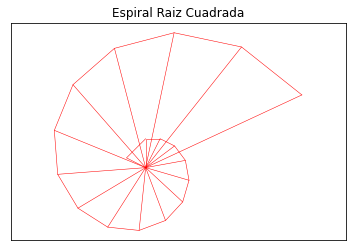

In [71]:
esp = Fractal()

puntos = [[[0, 1], [0, 0], [1, 0]]]
puntos = [[[1, 1], [0, 0], [1, -.51]]]
nivel = 16
esp.Espiral(puntos, nivel)

plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()
